# 📘 CLASS 2: Machine Learning & Statistics (Beginner Level)

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler


## **1. Scatter Plot (স্ক্যাটার প্লট)**  

**কী?**  
দুটি ভ্যারিয়েবলের মধ্যে সম্পর্ক বোঝার জন্য ব্যবহার হয়।  
প্রতিটি ডেটা পয়েন্টকে একটি **ডট (x,y)** আকারে প্লট করা হয়।  

**কেন দরকার?**  
- ML-এ ফিচারের মধ্যে সম্পর্ক বোঝার জন্য  
- ডিস্ট্রিবিউশন ও আউটলায়ার খুঁজে বের করার জন্য  


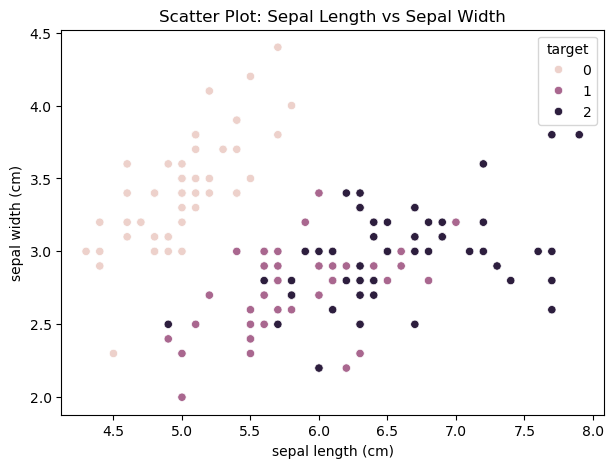

In [4]:
iris = load_iris(as_frame=True)
df = iris.frame

plt.figure(figsize=(7,5))
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', hue='target', data=df)
plt.title("Scatter Plot: Sepal Length vs Sepal Width")
plt.show()



## **2. Effect of Outliers on ML Model (আউটলায়ারের প্রভাব)**  

**কী?**  
Outlier হলো ডেটার এমন মান যা **অন্যদের থেকে অনেক আলাদা**।  

**কেন দরকার?**  
- Outlier থাকলে **গড় (mean)** নষ্ট হয়  
- ML মডেলের prediction ভুল হতে পারে  


In [5]:
X = np.array([1,2,3,4,5,100]).reshape(-1,1)  
y = np.array([2,4,6,8,10,200])

model = LinearRegression()
model.fit(X,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


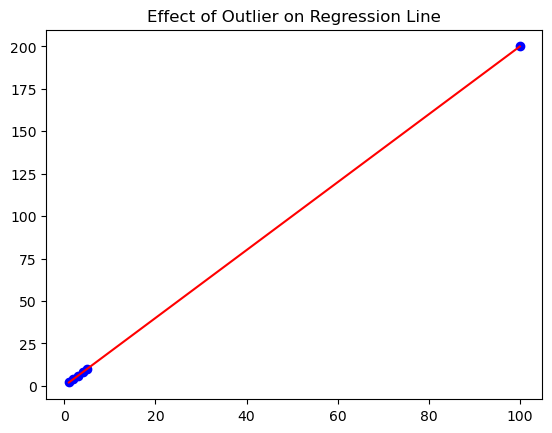

In [6]:
plt.scatter(X,y, color='blue')
plt.plot(X, model.predict(X), color='red')
plt.title("Effect of Outlier on Regression Line")
plt.show()



## **3. Effect of Standard Deviation on ML Model (স্ট্যান্ডার্ড ডেভিয়েশনের প্রভাব)**  

**কী?**  
Standard Deviation (SD) = ডেটা গড় থেকে কতটা ছড়ানো।  

**কেন দরকার?**  
- বেশি SD মানে ডেটা অস্থির  
- কম SD মানে ডেটা স্থিতিশীল  
- ML-এ Feature Scaling-এ ব্যবহার হয় (Standardization → Z-Score)  


In [7]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled = scaler.fit_transform(df[['sepal length (cm)', 'sepal width (cm)']])

print("স্কেলিং এর পর প্রথম ৫ রো:", scaled[:5])


স্কেলিং এর পর প্রথম ৫ রো: [[-0.90068117  1.01900435]
 [-1.14301691 -0.13197948]
 [-1.38535265  0.32841405]
 [-1.50652052  0.09821729]
 [-1.02184904  1.24920112]]



## **4. Correlation (সহসম্পর্ক)**  

**কী?**  
Correlation বলে দুটি ভ্যারিয়েবল একে অপরের সাথে কতটা সম্পর্কিত।  

- +1 = পুরোপুরি Positive সম্পর্ক  
- -1 = পুরোপুরি Negative সম্পর্ক  
- 0 = কোনো সম্পর্ক নেই  

**কেন দরকার?**  
- ML-এ highly correlated feature বাদ দিলে **overfitting কমে**  
- Feature Selection-এ কাজে লাগে  


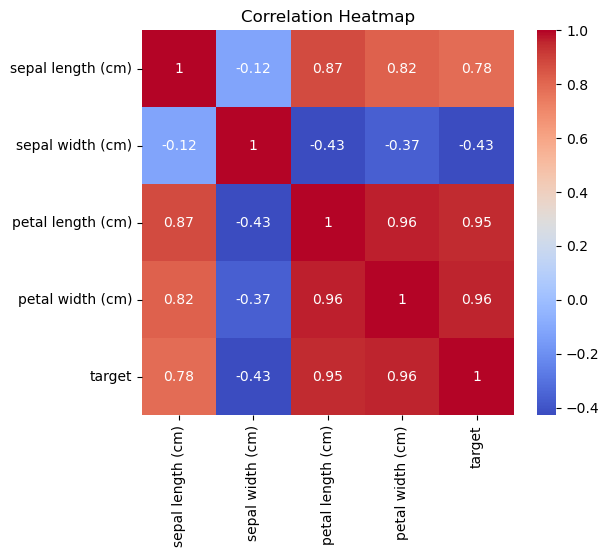

In [8]:

corr = df.corr(numeric_only=True)

plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()



## **5. Frequency and Cumulative Frequency (বারবারতা ও সঞ্চিত বারবারতা)**  

**কী?**  
- **Frequency:** কোন ভ্যালু কতবার হয়েছে  
- **Cumulative Frequency:** ধাপে ধাপে সব ফ্রিকোয়েন্সি যোগফল  

**কেন দরকার?**  
- ML-এ ডেটার distribution বোঝার জন্য  
- Class imbalance detect করার জন্য  


In [9]:

freq = df['target'].value_counts()
cum_freq = freq.cumsum()

print("Frequency:\n", freq)
print("\nCumulative Frequency:\n", cum_freq)


Frequency:
 target
0    50
1    50
2    50
Name: count, dtype: int64

Cumulative Frequency:
 target
0     50
1    100
2    150
Name: count, dtype: int64



## **6. Univariate Analysis (একভেরিয়েবল বিশ্লেষণ)**  

**কী?**  
একটি ভ্যারিয়েবল নিয়ে Distribution, Frequency, Boxplot ইত্যাদি বিশ্লেষণ।  

**কেন দরকার?**  
- ডেটার সার্বিক চিত্র বুঝতে  
- Outlier, Mean, Median বোঝার জন্য  


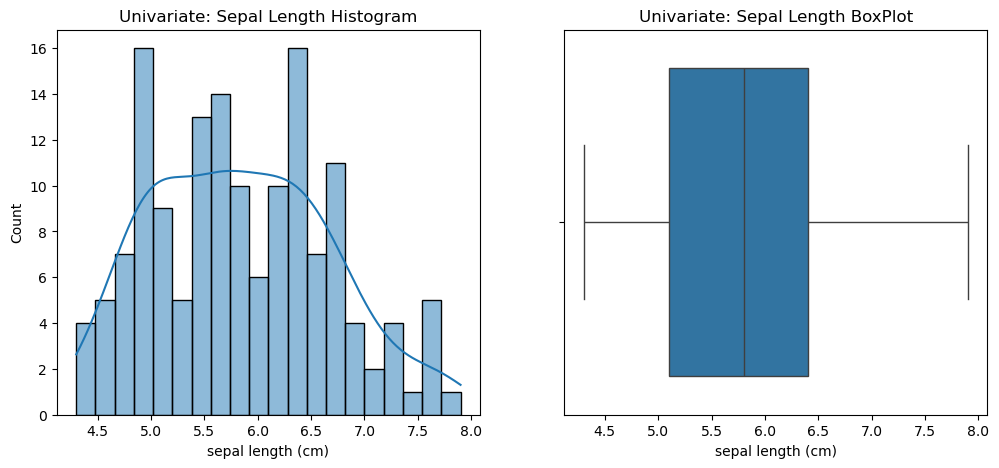

In [ ]:

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(df['sepal length (cm)'], bins=20, kde=True)
plt.title("Univariate: Sepal Length Histogram")

plt.subplot(1,2,2)
sns.boxplot(x=df['sepal length (cm)'])
plt.title("Univariate: Sepal Length BoxPlot")

plt.show()
